<a href="https://colab.research.google.com/github/mburu-mwangi/Moringa-Machine-Learning-Wk-2/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2021_10_Alfonce_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


> As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.



### b) Defining the Metric for Success


> My metric of success will be achieved by understanding and revealing the factors that affect housing prices.

> More to that, a model that predicts the prices of houses from given predictor variables will be necessary.

> Then comparing the different models to get the most suitable one, the one that gives the most desired results.

> Give recommendations using the best model.

### c) Understanding the context 

### d) Recording the Experimental Design

> The dataset wil have to be analyzed first, through the univariate, bivariate analysis.
> Then it will undergo modelling through few approaches:

*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression

### e) Data Relevance

The variables that ihave for the dataset are:

* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot1

I conclude that the data is relevant to the task given.

## 2. Reading the Data

### Importing the various libraries needed

In [160]:
# analysis tools
import pandas as pd
import numpy as np
import scipy.stats as stats

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Function Toolbox

In [161]:
# Removes outliers in the columns required
def Remove_Outlier(Df,col_name):
    q1 = Df[col_name].quantile(0.25)
    q3 = Df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_bound  = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    df_out = Df.loc[(Df[col_name] > lower_bound) & (Df[col_name] < upper_bound)]
    DF = df_out
    return DF

In [162]:
def bivariate_viz(data,variable_1,variable_2,palette):
  data = data.nunique
  bi_data = data.groupby([variable_1,variable_2])[variable_2].count()
  output = pd.DataFrame(bi_data)
  df = output.rename(columns={f"{variable_2}":'Count'}).reset_index()
  sns.set_style("whitegrid")
  ax,bar = plt.subplots(figsize = (12,10))
  ax=sns.barplot(x=f"{variable_1}",y='Count',hue=f"{variable_2}", data=df,palette=palette)

  plt.show()

### Loading the datasets


In [163]:
# Dataset URL = 'http://bit.ly/IndependentProjectWeek7Dataset'
#
URL = 'http://bit.ly/IndependentProjectWeek7Dataset'  
housing = pd.read_csv(URL)

In [164]:
# Preview of the data
#
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Checking the Data

In [165]:
# Determining the shape in our dataset
#
print('The Housing dataset has: ',housing.shape[0],'Rows and ',housing.shape[1],'Columns')

The Housing dataset has:  21613 Rows and  20 Columns


In [166]:
# Previewing the top of our dataset
#
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [167]:
# Previewing the bottom of our dataset
# 
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [168]:
# Checking whether each column has an appropriate datatype and the general info of every variable
# 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [169]:
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [170]:
# Dropping the unnecessary columns
#
housing = housing.drop(['grade', 'id', 'sqft_living15', 'sqft_lot15'], axis=1)

In [171]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,98074,47.6168,-122.045


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


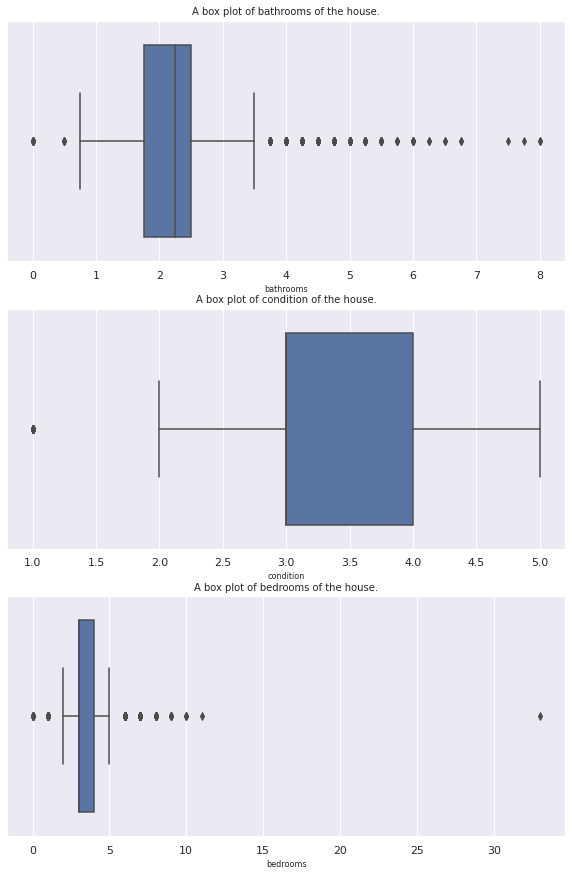

In [172]:
# Checking for Outliers
#
col_names=['bathrooms','condition','bedrooms']
fig,ax=plt.subplots(len(col_names),figsize=(10,15))
# 
for i, col_vals in enumerate(col_names):
  sns.boxplot(housing[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+col_vals+ ' of the house.',fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()

In [173]:
# housing['bathrooms'].value_counts()

In [174]:
# housing.loc[housing['bathrooms']>5 ]

In [175]:
# Checking for Anomalies
# dropping some exteme cases in the bathrooms and bedrooms columns 
housing = housing.drop(housing[housing['bedrooms'] > 8].index)
housing = housing.drop(housing[housing['bedrooms'] < 1].index)
housing = housing.drop(housing[housing['bathrooms'] < 0.5].index)

housing.shape

(21586, 16)

In [176]:
# Identifying the Missing Data
#
housing.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
dtype: bool

There are no missing values

In [177]:
# Checking for duplicates
#
housing.duplicated().sum()

5

In [178]:
# Dropping duplicates
#
housing = housing.drop_duplicates()

# Checking the shape
#
housing.shape

(21581, 16)

In [179]:
# reshaping the index
#
housing = housing.reset_index(drop=True)

## 6. Exploratory Analysis

### Univariate Analysis

In [180]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,98074,47.6168,-122.045


In [181]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.158100e+04,21581.000000,21581.000000,21581.000000,2.158100e+04,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000
mean,5.401660e+05,3.369075,2.114962,2079.662713,1.510649e+04,1.493721,0.007553,0.234234,3.409898,1788.215838,291.446875,1971.010519,84.249896,98077.948612,47.560052,-122.213943
std,3.673802e+05,0.894565,0.767536,917.663696,4.142709e+04,0.539557,0.086581,0.766325,0.650588,827.615966,442.451939,29.362585,401.332370,53.519671,0.138587,0.140742
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.042000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470800,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,8.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [182]:
# checking the basic decriptive analysis
#
print(housing['price'].mean())


540165.9630693665


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Houses that have waterfronts VS those that dont')

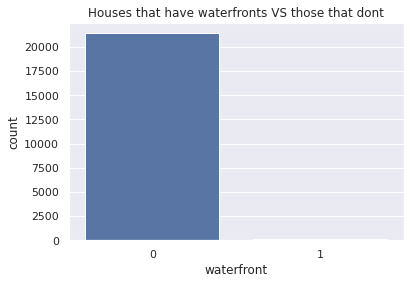

In [183]:
# plotting a visual on the houses that have waterfronts and those that don't
#
sns.countplot(housing['waterfront'],order=housing['waterfront'].value_counts().index)
plt.title('Houses that have waterfronts VS those that dont')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the number of floors in the houses')

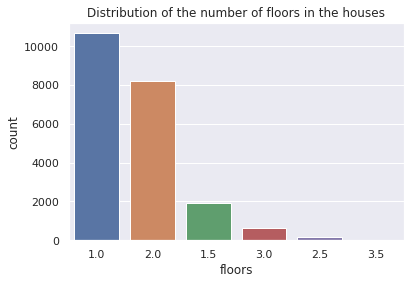

In [184]:
# Plotting for the number of floors across the houses in the dataset
#
sns.countplot(housing['floors'],order=housing['floors'].value_counts().index)
plt.title('Distribution of the number of floors in the houses')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the number of floors in the houses')

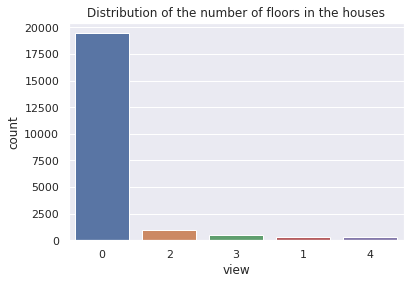

In [185]:
# Plotting for the number of floors across the houses in the dataset
#
sns.countplot(housing['view'],order=housing['view'].value_counts().index)
plt.title('Distribution of the number of floors in the houses')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the number of bathrooms in the houses')

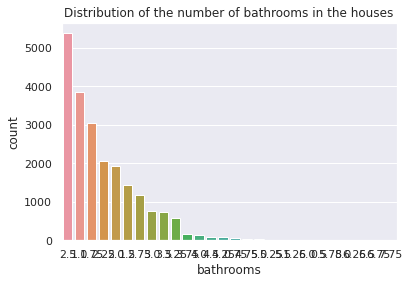

In [186]:
# plotting for th number of bathrooms across the houses in the dataset
#
sns.countplot(housing['bathrooms'],order=housing['bathrooms'].value_counts().index)
sns.set(rc = {'figure.figsize':(15,15)})
plt.title('Distribution of the number of bathrooms in the houses')

From the Univariate Analysis, I can state that:

*  The mean price of the houses is 540165.9630693665
*  Most of the houses do not have waterfronts
*  Most houses have 1 floor
*  Most houses have 2 complete bathrooms and 1 half bathroom
*  Majority of the houses do not have a view

### Bivariate Analysis

In [187]:
# checking the columns
#
housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

## 7. Implementing the Solution

### Linear Regression


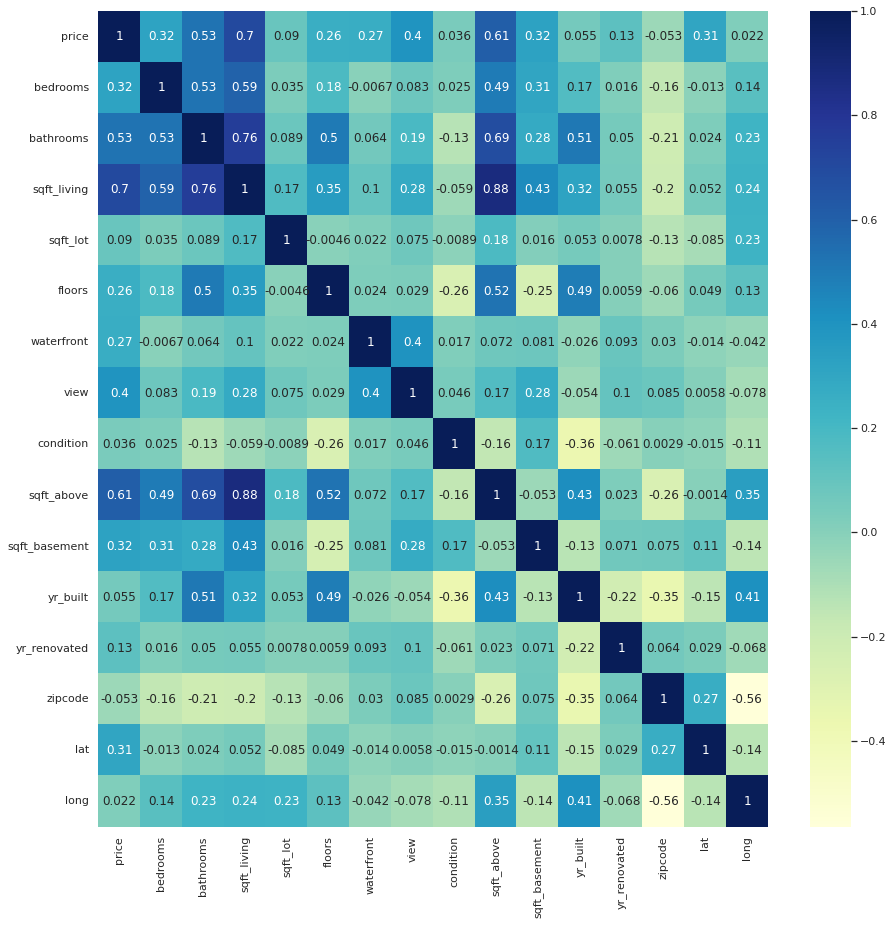

In [188]:
plt.figure(figsize=(15,15))
sns.heatmap(housing.corr(), annot=True, cmap="YlGnBu")

plt.show()

In [203]:
# Checking the weights of the predictor variables using the VIF formula
# 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = housing.drop(['price','sqft_living','sqft_above','yr_built'],axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         features    vif_Factor
0        bedrooms  2.217857e+01
1       bathrooms  1.892032e+01
2        sqft_lot  1.203782e+00
3          floors  1.546052e+01
4      waterfront  1.210154e+00
5            view  1.442588e+00
6       condition  3.166735e+01
7   sqft_basement  2.302262e+00
8    yr_renovated  1.069829e+00
9         zipcode  1.376290e+06
10            lat  1.294650e+05
11           long  1.221813e+06


The variables except 'yr_built' are closely correlated


In [204]:
from sklearn.model_selection import train_test_split

# getting our predictor and response variables
#
X = X.values
y = housing['price'].values

# Splitting the variables to test and trained data
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [205]:
from sklearn.linear_model import LinearRegression
# Getting the optimal coefficients and intercept
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.coef_)
print(regressor.intercept_)

[ 2.16881428e+04  1.76693285e+05  5.12846995e-01  5.40036152e+04
  5.92344933e+05  1.11931907e+05  4.25932176e+04  8.12193564e+01
  5.33871364e+01 -7.73206187e+02  8.26715657e+05 -1.68874906e+05]
15677744.248263365


In [199]:
# Predicting the values and checking the model
y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,4.317000e+03,4.317000e+03
mean,5.414667e+05,5.408157e+05
std,3.467414e+05,2.646903e+05
min,8.500000e+04,-6.094405e+04
25%,3.200000e+05,3.700114e+05
50%,4.550000e+05,5.163910e+05
75%,6.500000e+05,6.756719e+05
max,3.600000e+06,2.790026e+06


In [200]:

from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 160129.95114787653
Mean Squared Error: 57023585923.65947
Root Mean Squared Error: 238796.11789905519


In [202]:
# Using Cross Validation KFold
#

from sklearn.model_selection import KFold

# predictor variables
X = housing[['bedrooms', 'bathrooms', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]
y = housing['price'].values

folds = KFold(n_splits=10)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1


KeyError: ignored

In [ ]:
np.mean(RMSES)

In [159]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

492.9829595360852

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?